In [1]:
import pickle
from seirstat import Statistics
from datetime import datetime, timedelta

In [2]:
with open('stat.pkl', 'rb') as file:
    stat = pickle.load(file)
with open('parameters.pkl', 'rb') as file:
    parameters = pickle.load(file)

G:\Anaconda\envs\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Average final exposure count is 94962.0


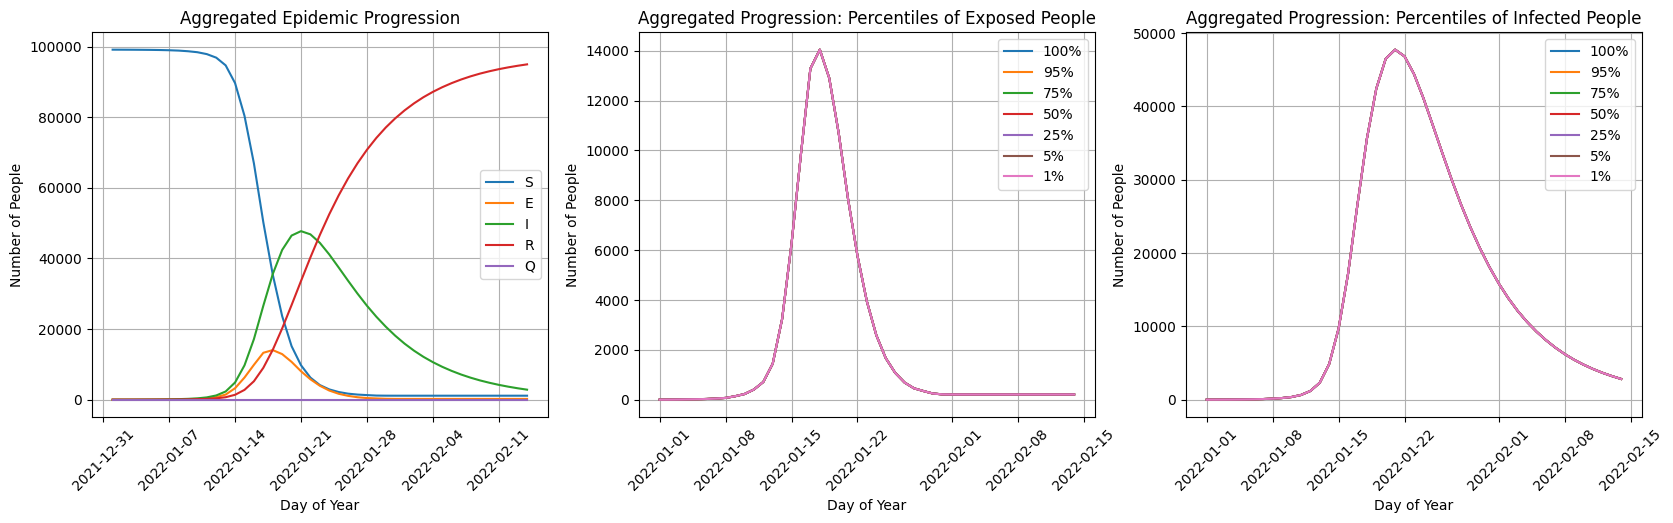

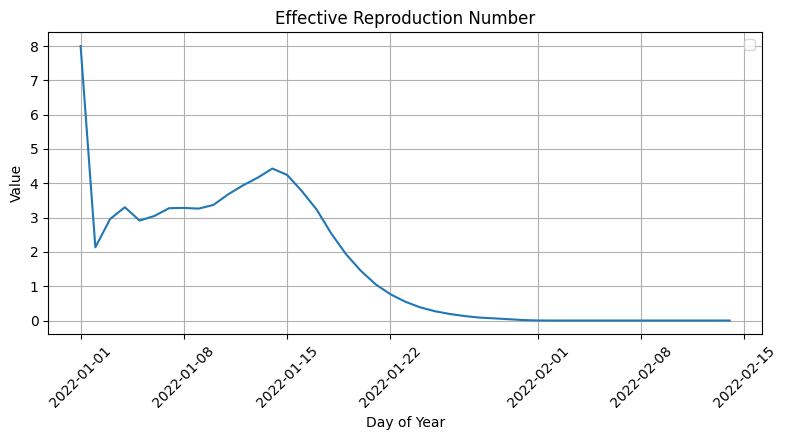

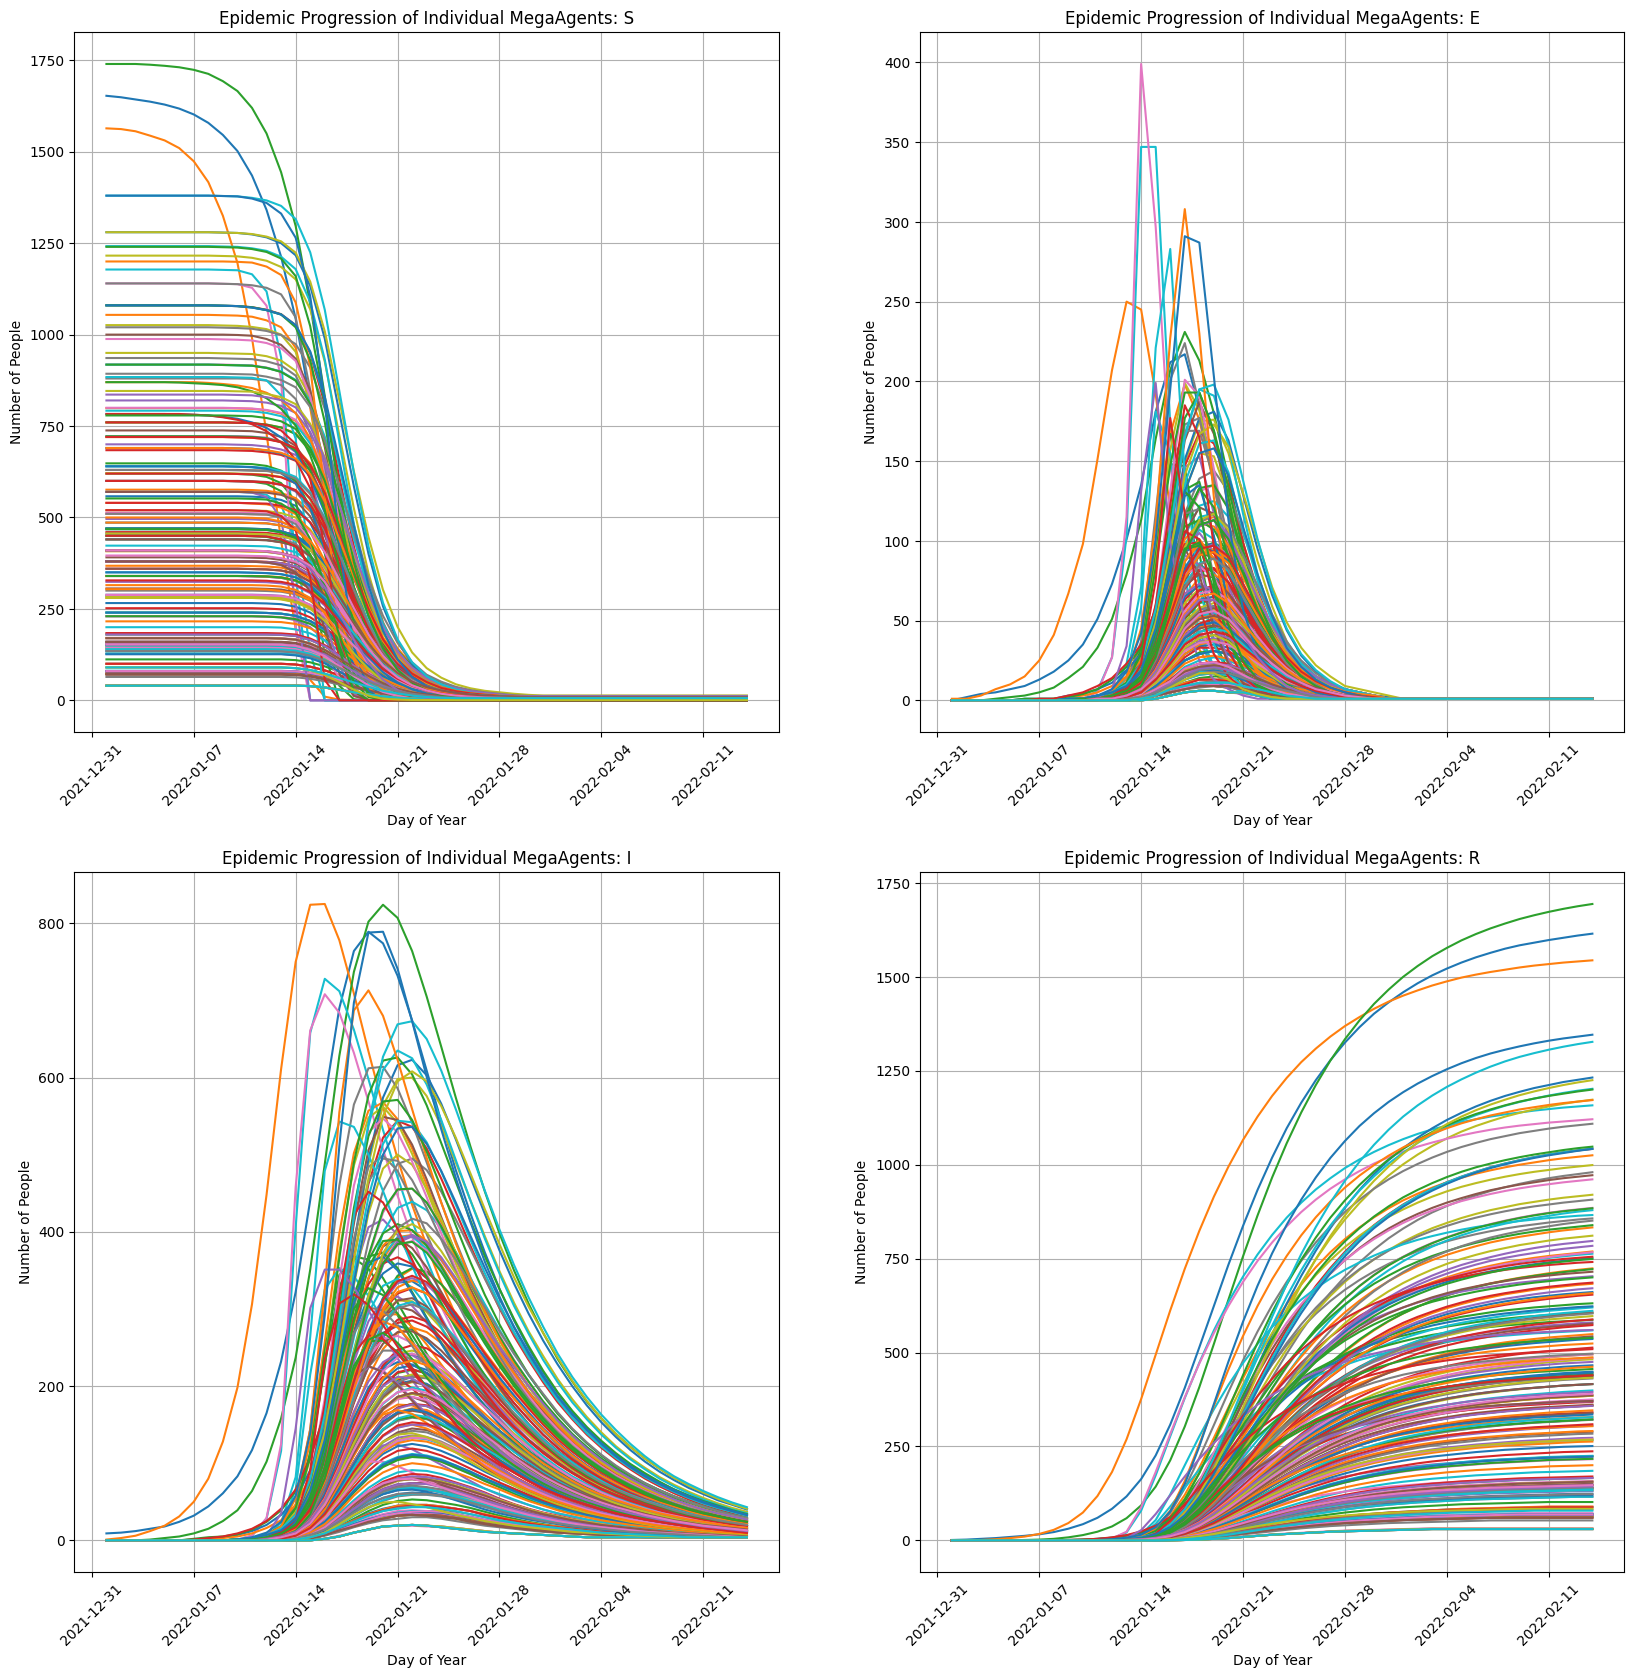

In [3]:
stat.plot_aggregated_progression(parameters)
stat.plot_MegaAgents_progressions()

In [ ]:
stat.all_mega_agents.keys()

In [ ]:
stat.R_effs[(2, 2)]

In [ ]:
Reff_agg = stat.get_aggregated_R_effs(stat.R_effs, parameters)

In [ ]:
aggregated = {}
total_new_Ia_count_dict = {}
total_new_Is_count_dict = {}
for d in stat.Tn:
    total_new_Ia_count_dict[d] = list()
    total_new_Is_count_dict[d] = list()
    day_R_effs = list()
    for i in range(parameters.Iteration):
        total_new_Ia_count = 0
        total_new_Is_count = 0
        total_Ia_count = 0
        total_Is_count = 0
        for mega_agent_name, mega_agent in stat.all_mega_agents.items():
            if mega_agent.MegaAgentPopulation == 0:
                continue  # Skip this iteration if population is zero

            total_new_Ia_count += stat.R_effs[mega_agent_name][d][i]["new infectious count"]["Ia count"]
            total_new_Is_count += stat.R_effs[mega_agent_name][d][i]["new infectious count"]["Is count"]
            total_Ia_count += stat.R_effs[mega_agent_name][d][i]["infectious count"]["Ia count"]
            total_Is_count += stat.R_effs[mega_agent_name][d][i]["infectious count"]["Is count"]
        total_new_Ia_count_dict[d].append(total_new_Ia_count)
        total_new_Is_count_dict[d].append(total_new_Is_count)

#         if d == stat.Tn[0]:
#             day_R_eff = 0
#             day_R_effs.append(day_R_eff)
        if total_Ia_count == 0 and total_Is_count == 0:
            day_R_eff = 0
            day_R_effs.append(day_R_eff)
        else:
            ################################################################################
            prob_asymI_to_R = parameters.infection_duration.rate_from_asymI_to_R
            Ia_denominator = 1e-9
            for day, total_new_Ia_count_list in total_new_Ia_count_dict.items():
                day_diff = (d-day).days
                if day_diff < 1:
                    day_diff = 1
                geometric_prob = prob_asymI_to_R * ((1.0-prob_asymI_to_R)**(day_diff-1.0))
                new_Ia_on_day = total_new_Ia_count_list[i]
                Ia_denominator += geometric_prob * new_Ia_on_day
            R_eff_Ia = total_new_Ia_count/Ia_denominator                  

            prob_symI_to_R = parameters.infection_duration.rate_from_symI_to_R
            Is_denominator = 1e-9
            for day, total_new_Is_count_list in total_new_Is_count_dict.items():
                day_diff = (d-day).days
                if day_diff < 1:
                    day_diff = 1
                geometric_prob = prob_symI_to_R * ((1.0-prob_symI_to_R)**(day_diff-1.0))
                new_Is_on_day = total_new_Is_count_list[i]
                Is_denominator += geometric_prob * new_Is_on_day
            print("Is_denominator: " + str(Is_denominator))
            print("total_new_Is_count: " + str(total_new_Is_count))
            R_eff_Is = total_new_Is_count/Is_denominator
            
            day_R_eff = parameters.infection_duration.asym_fraction * R_eff_Ia +\
            (1-parameters.infection_duration.asym_fraction) * R_eff_Is

            ################################################################################
            # days_Ia_infectious = 1.0/parameters.infection_duration.rate_from_asymI_to_R
            # Ia_denominator = total_Ia_count * days_Ia_infectious
            # R_eff_Ia = total_new_Ia_count/Ia_denominator  

            # days_Is_infectious = 1.0/parameters.infection_duration.rate_from_symI_to_R
            # Is_denominator = total_Is_count * days_Is_infectious
            # R_eff_Is = total_new_Ia_count/Is_denominator    

            # day_R_eff = parameters.asym_fraction * R_eff_Ia +\
            #             (1-parameters.asym_fraction) * R_eff_Is
            ################################################################################

            day_R_effs.append(day_R_eff)
    aggregated[d] = day_R_effs

In [ ]:
aggregated